<a href="https://colab.research.google.com/github/B-pallavi123/ML-AI-DS/blob/main/Assigment_for_HAI_interview_(2)_(5)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamental Machine Learning Questions

## Easy
### Score - 3 points for each correct and confident answer
1. What is the difference between supervised, semi-supervised, weakly supervised, and unsupervised learning?

2. Can you explain the concept of overfitting? How can you avoid it? Answer the question from a traditional ML perspective.

3. What is generalization? How do you evaluate a model's ability to generalize?


## Medium
### Score - 5 points for each correct and confident answer

1. Explain the Bias and Variance Trade-off. What is the need to trade-off? What is the importance of each (bias and variance)?

2. Is the Logistic Regression model a regression model? If yes, what is the core working principle behind it?

3. What are the metrics generally used for a classification problem? Can you build a confusion matrix and how many metrics can one derive from it?


## Hard
### Score - 8 points for each correct and confident answer

1. Describe briefly a project you worked on and please share the GitHub repo (code). What was your underlying motivation to start off with this project?

2. Discuss various preprocessing methods used in ML such as data imputation, dimensionality reduction, data normalization, and feature selection. What are various techniques or ways to solve each of the problems? Is there a global solution to tackle all these problems at once? If no, what could be the reason?

3. Pick a machine learning deterministic algorithm of your choice from the below list and provide an in-detail explanation of the underlying mathematical formulation and use the sklearn library (https://scikit-learn.org/stable/) to implement it on the data of your choice from the UCI repo (https://archive.ics.uci.edu/).

Algorithm List: [Linear Regression, Logistic Regression, Decision Tree Regressor/Classifier, Support Vector Regressor/Classifier]


#**Answers**

##**Easy**

###**1. What is the difference between supervised, semi-supervised, weakly supervised, and unsupervised learning?** <br>

   In machine learning, the choice between supervised, semi-supervised, weakly-supervised, and unsupervised paradigms is not just a technicality but a fundamental design decision that determines model reliability, data requirements, and applicability—especially critical in healthcare, where data is often scarce, noisy, and costly to annotate.

1. **Supervised Learning:** <br>
   **Definition:**The model learns from a fully labeled dataset {X, y}, where each input X has a corresponding, ground-truth output y. The goal is to learn a mapping f: X -> y. <br>
   **Examples**:
   *  **Diabetic Retinopathy Detection**: An algorithm is trained on thousands of retinal images where each image has been labeled by ophthalmologists as containing the disease or not.

   * **Pneumonia Detection in X-Rays:** A model learns from X-rays that radiologists have explicitly marked as showing signs of pneumonia.

   **Importance**:High accuracy with reliable labels

1. **Semi-Supervised Learning:** <br>
   **Definition:**A pragmatic hybrid where the model learns from a small amount of labeled data combined with a large amount of unlabeled data. The core idea is that the structure of the unlabeled data can improve the learning process. <br>
   **Examples**:
   *  **Health Record Analysis:** Using a small set of patients with confirmed heart failure to leverage a much larger database of unlabeled patient records to predict who is at risk

   * **Rare Disease Diagnosis:** A semi-supervised model uses a 100,000 of unlabeled medical images to learn general features, greatly enhancing its ability to accurately identify a rare cancer from only a 100 set of labeled examples.

   **Importance**:Solves the Label Scarcity Problem
3. **Weakly Supervised Learning:** <br>
   **Definition:**The model learns from imprecise, incomplete, or noisy labels. The labels are easier/cheaper to get but are not the perfect "ground truth" we would ideally want <br>
   **Types**:
   *  **Inexact Supervision:**
       * **Example:** Training a model to find tumors in a whole pathology slide using only a slide-level label (e.g., "this entire slide is cancerous"). The model must learn to localize the tumor itself without anyone telling it exactly which pixels are cancerous.

   * **Noisy Supervision:**

      *  **Example:** Using text from radiology reports (e.g., "the lung shows opacities consistent with pneumonia") as a noisy label for the associated chest X-ray. The text is a label, but it's not as precise as a radiologist drawing a box around the infection.

   **Importance**:Most real-world hospital data is weakly labeled



4. **Unsupervised Learning:** <br>
    **Definition:** The model learns patterns from data that has no labels at all. Its goal is to find hidden structure, groupings, or patterns within the data itself. Common tasks are clustering , dimensionality reduction, and anomaly detection. <br>

    **Examples**:
   * **Cancer Subtyping:** Analyzing genetic data from thousands of breast cancer patients to discover new subtypes that are genetically distinct, which could lead to more personalized therapies.

   * **Patient Stratification:** Clustering EHR data to identify groups of patients with similar comorbidities and outcomes, which can help hospitals manage population health

   **Importance**:Enables hypothesis generation when ground-truth labels are missing.















   **The chart illustrates the *spectrum of machine learning paradigms* based on their *label dependency* and highlights their relevance in healthcare applications**

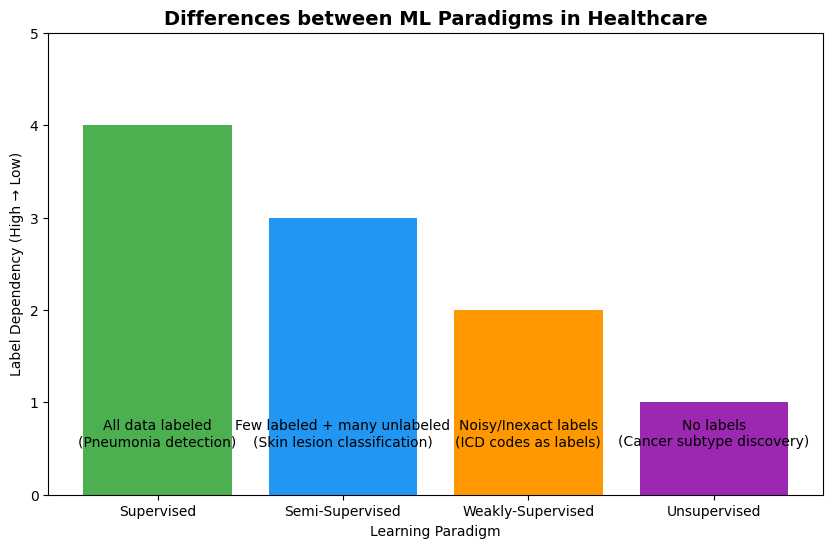

In [ ]:
import matplotlib.pyplot as plt

categories = ["Supervised", "Semi-Supervised", "Weakly-Supervised", "Unsupervised"]
labels = [
    "All data labeled\n(Pneumonia detection)",
    "Few labeled + many unlabeled\n(Skin lesion classification)",
    "Noisy/Inexact labels\n(ICD codes as labels)",
    "No labels\n(Cancer subtype discovery)"
]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(categories, [4,3,2,1], color=["#4CAF50","#2196F3","#FF9800","#9C27B0"])

# Add text labels
for i, label in enumerate(labels):
    ax.text(i, 0.5, label, ha='center', va='bottom', fontsize=10, wrap=True)

ax.set_title("Differences between ML Paradigms in Healthcare", fontsize=14, fontweight='bold')
ax.set_ylabel("Label Dependency (High → Low)")
ax.set_xlabel("Learning Paradigm")
ax.set_ylim(0,5)
#ax.get_yaxis().set_visible(False)

plt.show()


### **Interpretation of the Visualization:**
1. **Supervised Learning**: Requires fully labeled datasets. While effective (e.g., pneumonia detection from X-rays), it suffers from **annotation bottlenecks** since radiologist labeling is expensive and time-consuming.  
2. **Semi-Supervised Learning**: Combines a small fraction of labeled data with large pools of unlabeled data. This is especially powerful in **dermatology** or **pathology**, where only a few expert-labeled images are available, but unlabeled data is abundant.  
3. **Weakly-Supervised Learning**: Leverages noisy or inexact labels, such as **ICD codes** from electronic health records (EHRs). While this scales to millions of records, label noise can reduce accuracy unless advanced methods (e.g., noise-robust training) are applied.  
4. **Unsupervised Learning**: Works entirely without labels and is key for **knowledge discovery**. For example, clustering genomic data can reveal novel cancer subtypes, enabling **personalized medicine**.

### 🔬 Research Significance

Healthcare data is often:
- **Scarce in expert annotations**,  
- **Rich in unlabeled modalities** (EHRs, genomic data, medical imaging), and  
- **Prone to noisy labels** from large-scale hospital systems.  

Thus, **semi-supervised and weakly-supervised paradigms** are highly impactful in healthcare, bridging the gap between **clinical reality (limited labels)** and **AI-driven decision support systems**.  

This visualization emphasizes the **trade-off between label quality and scalability** and motivates why **next-generation healthcare AI systems** must go beyond purely supervised learning.

2. **Can you explain the concept of overfitting? How can you avoid it? Answer the question from a traditional ML perspective** <br>
###**Overfitting:**
Overfitting occurs when a model learns the training data too well, including its statistical noise, outliers, and random fluctuations, instead of the underlying true distribution. This results in a model with very high performance on the training data but poor performance on unseen test data (poor generalization). It is a sign of high variance, meaning the model's performance is highly sensitive to the specific training set it saw.

  **Why it's a Critical Problem in Healthcare:** An overfit model is dangerously misleading. It might achieve 99% accuracy on hospital records from 2015-2020 but fail catastrophically on data from 2021 or from a different hospital. Deploying such a model could lead to misdiagnosis, incorrect treatment recommendations, and ultimately, patient harm. Ensuring robustness and generalization is a matter of clinical safety, not just technical performance.
###**Avoiding Overfitting (Traditional ML Perspective):**

    * **Simpler Models / Regularization:** Choosing a less complex model (e.g., linear model over a high-degree polynomial) intrinsically reduces overfitting. Regularization techniques (L1/Lasso, L2/Ridge) explicitly penalize model complexity by adding a term to the loss function that shrinks coefficient values towards zero. L1 can also perform feature selection.

    * **Cross-Validation:** Using k-fold cross-validation provides a more robust estimate of a model's performance on unseen data than a single train-test split, helping to select models that generalize well.

    * **Feature Selection/Engineering:** Reducing the number of irrelevant or redundant features (e.g., using Recursive Feature Elimination or domain knowledge) decreases the model's capacity to memorize noise.

    * **More Data:** Increasing the size and diversity of the training data is one of the most effective ways to help the model learn the true data distribution rather than spurious correlations. In healthcare, this often involves multi-center studies to capture population diversity.

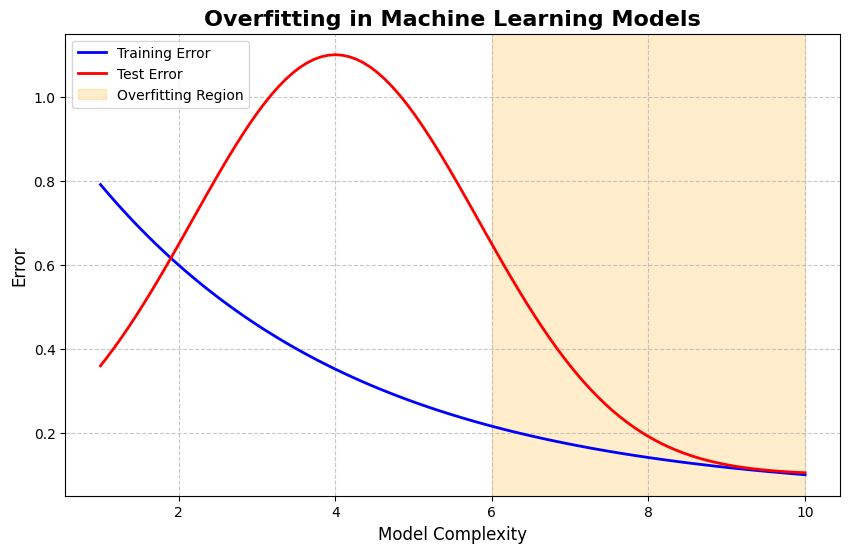

In [ ]:
# ==============================================================
# Overfitting Visualization (Training vs Test Error)
# ==============================================================
import numpy as np
import matplotlib.pyplot as plt

# Simulate model complexity
x = np.linspace(1, 10, 100)
train_error = np.exp(-0.3 * x) + 0.05  # decreasing with complexity
test_error = np.exp(-0.15 * (x - 4) ** 2) + 0.1  # U-shaped curve

plt.figure(figsize=(10,6))
plt.plot(x, train_error, label="Training Error", color="blue", linewidth=2)
plt.plot(x, test_error, label="Test Error", color="red", linewidth=2)

# Highlight overfitting zone
plt.axvspan(6, 10, color="orange", alpha=0.2, label="Overfitting Region")

plt.title("Overfitting in Machine Learning Models", fontsize=16, fontweight="bold")
plt.xlabel("Model Complexity", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### 🔬 Interpretation

The plot shows the relationship between **training error** and **test error** as model complexity increases:

- **Left (Low complexity – underfitting):**  
  The model is too simple, e.g., a linear regression predicting complex patient outcomes.  
  Both training and test errors are high.

- **Middle (Optimal complexity):**  
  Both errors are minimized. The model generalizes well to unseen patient data.  

- **Right (High complexity – overfitting):**  
  Training error is very low (memorization), but test error increases.  
  In healthcare, this could mean a cancer detection model is **memorizing dataset-specific noise**, failing on new patient scans.

📌 **Key Research Insight:**  
Overfitting is especially risky in healthcare where datasets are often small and imbalanced.  
Thus, rigorous **cross-validation**, **external validation across hospitals**, and **regularization** are essential to build clinically trustworthy models.


3. **What is generalization? How do you evaluate a model's ability to generalize?** <br>
#**Generalization:**
 **Generalization** is the ability of a model to perform well on **unseen data** — data not used during training,after being trained on a limited training dataset.  A model that generalizes well has captured the **underlying patterns** in the data rather than memorizing noise.  

 -->The central challenge in ML is balancing l**earning the important patterns without memorizing the irrelevant noise**

 **How to Evaluate a Model's Ability to Generalize?** <br>
 we can evaluate generalization by rigorously testing the model's performance on data it was never allowed to see during training.

 Here is the standard process and the key techniques used:

 1.**The Train-Test Split**:<br>
The simplest method is to split your entire dataset into two parts before training:

   * **Training Set:** The larger portion (e.g., 70-80%) used to train the model.

   * **Test Set:** The remaining portion (e.g., 20-30%) that is locked away and never used during training. It is only used once, at the very end, to evaluate the final model's performance.

  **How it evaluates generalization:** <br> The performance gap between the training set and the test set tells you a lot.

    * **High Training Accuracy, Low Test Accuracy = Overfitting.**

    * Similar Training and Test Accuracy = Good Generalization.

    * Low Training and Low Test Accuracy = Underfitting.

  **2.Cross-Validation:** <br>
A more robust and sophisticated technique than a simple train-test split, especially for smaller datasets.

 * k-Fold Cross-Validation is the most common method:

    * The data is randomly shuffled and split into k equal-sized groups (called "folds").

    * The model is trained k times. Each time, a different fold is used as the test set, and the remaining k-1 folds are combined to form the training set.

    * This results in k different performance scores.The final reported score is the average of these k scores.

  **How it evaluates generalization:**

  * It uses every data point in the dataset for both training and testing, just in different rounds, providing a more reliable estimate of performance.

  * The standard deviation of the k scores indicates the model's consistency. A **low standard deviation means the model generalizes well** across different subsets of the data. A **high standard deviation means its performance is volatile** and depends heavily on which data points are in the training set.

 3.**Use a Validation Set:** <br>
In real-world workflows, you need a way to tune your model's hyperparameters (e.g., learning rate, network depth) without leaking information into the test set. This is done with a validation set.

 The typical split becomes:

 * **Training Set:** Used to train the model.

  * **Validation Set:** Used to evaluate the model during training to tune hyperparameters and select the best model version. This is the "simulated test set" for your development cycle.

  * **Test Set:** Used exactly once at the very end to provide an unbiased final evaluation of the model that was selected based on the validation set performance.

  **How it evaluates generalization:** <br> The performance on the validation set guides your tuning decisions to avoid overfitting. The final test on the completely untouched test set is the ultimate test of generalization.

  **Key Metrics for Evaluation** <br>
 The choice of metric is crucial and depends on the problem:

    * **For Classification:** Accuracy, Precision, Recall, F1-Score, ROC-AUC.

   * **For Regression:** Mean Absolute Error (MAE), Mean Squared Error (MSE), R-squared.

   * **The Crucial Comparison:** Always compare the metric on the training set vs. on the test/validation set.

 **Summary:** How to Know if Model Generalizes Well <br>
  The model generalizes well if:

  * Performance on the test set is high (and close to the performance on the training set).

  * The performance is consistent across different splits of the data (e.g., low standard deviation in k-fold cross-validation).

 * It performs well on real-world, out-of-sample data that it encounters after deployment.

**Key Insight:** In healthcare, generalization means **robustness and trustworthiness** — a non-negotiable requirement for deployment in real-world clinical workflows.


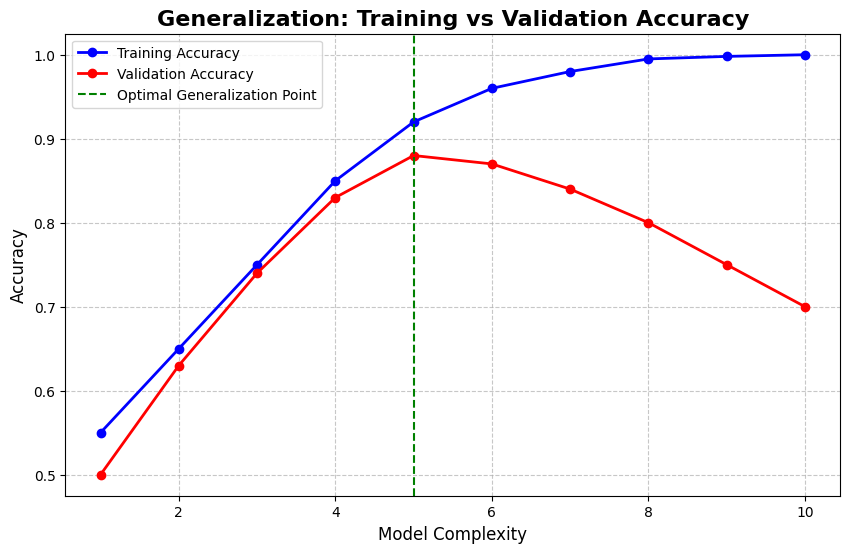

In [ ]:
# ==============================================================
# Generalization Visualization: Training vs Validation Accuracy
# ==============================================================
import numpy as np
import matplotlib.pyplot as plt

# Simulated model complexities
complexity = np.arange(1, 11)

# Simulated training/validation accuracy
train_acc = [0.55, 0.65, 0.75, 0.85, 0.92, 0.96, 0.98, 0.995, 0.998, 1.0]
val_acc   = [0.50, 0.63, 0.74, 0.83, 0.88, 0.87, 0.84, 0.80, 0.75, 0.70]

plt.figure(figsize=(10,6))
plt.plot(complexity, train_acc, label="Training Accuracy", marker="o", linewidth=2, color="blue")
plt.plot(complexity, val_acc, label="Validation Accuracy", marker="o", linewidth=2, color="red")

plt.axvline(x=5, linestyle="--", color="green", label="Optimal Generalization Point")

plt.title("Generalization: Training vs Validation Accuracy", fontsize=16, fontweight="bold")
plt.xlabel("Model Complexity", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### 🔬 Interpretation

The visualization highlights **training vs validation accuracy** across model complexities:

- **Low Complexity (1–3): Underfitting**  
  Both training and validation accuracy are low → model too simple, fails to capture patterns.  

- **Moderate Complexity (4–6): Good Generalization**  
  Training accuracy is high, validation accuracy is also high and stable → model generalizes well.  
  ✅ Point 5 is the sweet spot.  

- **High Complexity (7–10): Overfitting**  
  Training accuracy approaches 100%, but validation accuracy declines → model memorizes training data.  
  🚫 In healthcare, this could mean a diagnostic model works on one dataset but fails on real-world patient scans.  

---

📌 **Research Takeaway:**  
Generalization is not just about accuracy — it is about **robustness across populations**.  
For healthcare deployment, models should undergo:  
- **Cross-hospital validation**  
- **External datasets testing**  
- **Fairness analysis across demographics**  

Only then can they be trusted for real-world use in critical applications like **cancer diagnosis, drug discovery, or personalized medicine**.


#**Medium**


**1. Explain the Bias and Variance Trade-off. What is the need to trade-off? What is the importance of each (bias and variance)?**

The **Bias-Variance Trade-off** is a fundamental concept in supervised machine learning that describes the relationship between a model's complexity, its error from incorrect assumptions (bias), and its error from sensitivity to small fluctuations in the training set (variance).

**Bias:** Bias is the error introduced by a model that is too simple to capture the underlying patterns in the data. A model with high bias makes strong, incorrect assumptions about the data, leading to underfitting. For example, trying to fit a complex, non-linear relationship with a straight line would result in high bias. <br>
   * **Importance:** While high bias is bad, a certain level of bias is necessary to create a model that can generalize. A model with no bias would have to be impossibly complex to represent reality perfectly.

**Variance:** Variance is the error due to a model's sensitivity to small fluctuations in the training data. A model with high variance is too complex and learns the noise in the training set, leading to overfitting. For example, a very complex decision tree might learn every specific data point, making it unable to generalize to new data.
 * **Importance:** Variance represents the model's flexibility. A model with zero variance would be completely rigid and unable to learn any patterns from the data at all.

The **trade-off** is the balance between these two sources of error. A simple model has high bias and low variance, while a complex model has low bias but high variance. The goal is to find a model that is just complex enough to capture the true patterns in the data without learning the noise. This minimizes the total error and maximizes the model's ability to generalize to new data.

**The Need for a Trade-off:** <br>
The need for this trade-off arises from the fundamental goal of machine learning: to build a model that performs well on unseen data (generalizes), not just the data it was trained on.

* As model complexity increases, variance increases (the model fits the training data more closely) and bias decreases.

* As model complexity decreases, bias increases (the model makes stronger assumptions) and variance decreases. <br>

->**Low Bias + Low Variance** → Ideal but rarely achievable.  
->**High Bias + Low Variance** → Model underfits (systematic errors).  
->**Low Bias + High Variance** → Model overfits (memorizes training data).  

Hence, we need to **balance** bias and variance to minimize **Total Error** (generalization error).  

### 🏥 Healthcare Importance

Bias-Variance balance is **critical in healthcare**:
- **High Bias Example:** A simple model that underestimates rare diseases → misses critical diagnoses (false negatives).  
- **High Variance Example:** A complex model trained on one hospital’s data may misdiagnose patients from another demographic.  
- **Balanced Trade-off:** Ensures models detect diseases accurately **across populations** without being misled by noise.  

📌 In clinical AI, the trade-off directly affects **patient safety, trust, and regulatory approval**.

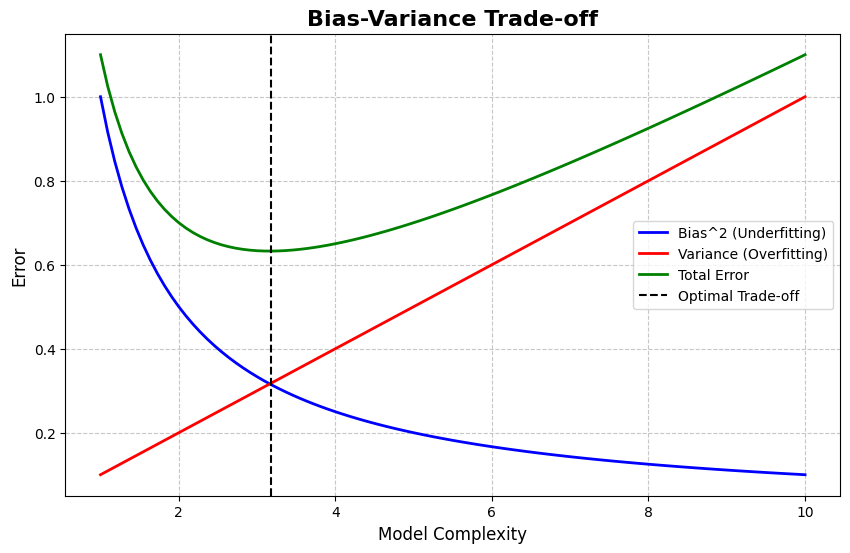

In [ ]:
# ==============================================================
# Bias-Variance Trade-off Visualization
# ==============================================================
import numpy as np
import matplotlib.pyplot as plt

# Complexity values
complexity = np.linspace(1, 10, 100)

# Simulated curves
bias = 1 / complexity        # Bias decreases with complexity
variance = complexity / 10   # Variance increases with complexity
total_error = bias + variance

# Plot
plt.figure(figsize=(10,6))
plt.plot(complexity, bias, label="Bias^2 (Underfitting)", linewidth=2, color="blue")
plt.plot(complexity, variance, label="Variance (Overfitting)", linewidth=2, color="red")
plt.plot(complexity, total_error, label="Total Error", linewidth=2, color="green")

# Mark optimal point
optimal_idx = np.argmin(total_error)
plt.axvline(x=complexity[optimal_idx], linestyle="--", color="black", label="Optimal Trade-off")

plt.title("Bias-Variance Trade-off", fontsize=16, fontweight="bold")
plt.xlabel("Model Complexity", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### 🔬 Interpretation

The figure illustrates the **bias-variance trade-off**:

- **Left Side (Low Complexity): High Bias, Low Variance**  
  The model underfits → it cannot capture patient-specific variations (e.g., predicting everyone as "healthy").  

- **Right Side (High Complexity): Low Bias, High Variance**  
  The model overfits → memorizes training data (hospital A patients) but fails on unseen populations (hospital B patients).  

- **Middle Point: Optimal Trade-off**  
  Both bias and variance are balanced → minimal total error, best generalization.  

---

### 📊 Research Perspective

- **Bias is important**: Some bias is necessary to simplify real-world problems (e.g., approximating complex biological systems).  
- **Variance is important**: Variability helps capture subtle patterns (e.g., rare genetic markers), but must be controlled.  
- **The trade-off ensures robustness**: Especially in healthcare, where models should work reliably **across demographics, hospitals, and devices**.  

📌 **Key Takeaway:**  
A well-balanced model in healthcare not only achieves high accuracy but also ensures **fairness, safety, and reproducibility**, which are prerequisites for clinical deployment.


2. **Is the Logistic Regression model a regression model? If yes, what is the core working principle behind it?** <br>
###**Logistic Regression**:
  **The Logistic Regression model is not a regression model; it is a classification model**. Despite its name, it is used to predict a discrete outcome, such as "yes" or "no," "pass" or "fail," or "spam" or "not spam."

  The **core working principle** behind it is the **sigmoid function (also known as the logistic function)**. The model takes a linear combination of input features and passes it through this function. The sigmoid function maps any real-valued number to a value between 0 and 1, which can be interpreted as a probability.

  For example, a probability of 0.8 might mean there is an 80% chance of the outcome being "yes." A threshold (e.g., 0.5) is then used to convert this probability into a final binary classification.

  **Core Working Principle:** <br>  A Two-Stage Process
The working principle can be elegantly broken down into two connected stages:

  **Stage 1:** The Linear Regression Component
The model first calculates a linear combination of the input features, exactly as a standard linear regression model would:<br>
  **$ z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ $**
Where:

    z is the linear score (also called the logit).

  β₀ is the bias term (intercept).

  β₁, β₂, ..., βₙ are the weights (coefficients) for the features x₁, x₂, ..., xₙ.

 This value z can range from -∞ to +∞.

  **Stage 2:** The Logistic (Sigmoid) Transformation
The linear score z is then passed as input into the sigmoid function.
$$ σ(z) =\frac{ 1} { (1 + e^{-z})} $$

  The magic of this function is that it maps any real number z to a smooth, S-shaped curve bounded between 0 and 1. This output is interpreted as the probability that the given input instance belongs to the default class (e.g., Class 1).
$$P(Y=1 | X) =  σ(z) =\frac{ 1} { (1 + e^{-z})} $$

  **Why it’s important in research/healthcare context**

  Logistic Regression is interpretable → coefficients tell how much each factor contributes to the outcome.

 It is efficient and works well for linearly separable data.

 In healthcare, logistic regression is often used for risk prediction (e.g., probability of disease given age, BMI, blood sugar).

 **Why is this so powerful?**

 Probabilistic Interpretation: Unlike other classifiers that just output a label, Logistic Regression provides a well-calibrated probability (e.g., "This email has an 82% chance of being spam"). This is invaluable for risk assessment and decision-making.

 Linear Decision Boundary: The transformation maintains a linear decision boundary. The model will predict Class 1 if P(Y=1 | X) >= 0.5. This happens when z >= 0. Since z is linear, the boundary where z = 0 is a line (or a hyperplane in higher dimensions).

 **Summary** <br>
  To conclude, while Logistic Regression is overwhelmingly used for classification tasks, its name is apt because its internal mechanism is based on estimating the continuous log-odds of a probability through a regression framework. The sigmoid function is the crucial link that transforms this regression output into a probability, enabling its use for powerful and interpretable classification.

3.**What are the metrics generally used for a classification problem? Can you build a confusion matrix and how many metrics can one derive from it?**<br>

 **Common Classification Metrics:**

  * Accuracy

* Precision

* Recall (Sensitivity)

* F1-Score

* Specificity

* AUC-ROC (Area Under the ROC Curve)

1. **Accuracy**: <br>
Definition: Accuracy measures the overall fraction of correct predictions (both positive and negative) made by the model out of all predictions. It answers the question: "How often is the classifier correct?"

 $ Accuracy = \frac{(TP + TN)} { (TP + TN + FP + FN)} $

 **When to Use:** It is a good measure only when the classes are perfectly balanced (i.e., the number of positive and negative examples in the data is roughly equal). It can be very misleading for imbalanced datasets.

 **Example:** If 95% of your emails are "Not Spam" and 5% are "Spam", a model that simply predicts "Not Spam" for every email would have a 95% accuracy, even though it is useless at actually catching spam.

2. **Precision** <br>
 Precision measures the quality of a positive prediction. It answers the question: "When the model predicts 'positive', how often is it correct?" It is concerned with minimizing False Positives (FP).<br>
  $ Precision = \frac{TP} {(TP + FP)} $

 **When to Use:** Precision is crucial in scenarios where the cost of a False Positive is high.

 **Example - Spam Detection:** If an important work email is incorrectly flagged as spam (a False Positive), the consequence is high (you might miss critical information). Therefore, you want your spam classifier to have high precision, ensuring that when it does predict "spam", it's very likely to be correct.

3. **Recall (Sensitivity or True Positive Rate - TPR)** <br>
 Recall measures the completeness of positive predictions. It answers the question: "What proportion of all actual positive instances did the model correctly identify?" It is concerned with minimizing False Negatives (FN).

   $ Recall = \frac{TP}  {(TP + FN)} $

 **When to Use:** Recall is crucial in scenarios where the cost of a False Negative is high.

 **Example - Disease Screening:** If a patient has a disease but the model fails to detect it (a False Negative), the consequence is catastrophic (the disease goes untreated). Therefore, a cancer screening test must have high recall—it's more important to catch all possible cases, even if it means some healthy patients are initially flagged for further testing (False Positives).

4. **F1-Score**
The F1-Score is the harmonic mean of Precision and Recall. It provides a single metric that balances the two, especially useful when you need to find a compromise between minimizing both False Positives and False Negatives.

 $ F1-Score = \frac{2 * (Precision * Recall)} { (Precision + Recall) } $

 **Why Harmonic Mean?** The harmonic mean is used instead of a simple average because it punishes extreme values. A simple average of 1.0 (perfect) and 0.0 (terrible) is 0.5, which is misleading. The harmonic mean of the same values is 0. This makes the F1-score a more conservative and reliable measure of a model's performance when dealing with class imbalance.

 **When to Use:** It is the best metric to use if you need a single number to evaluate a classifier and if there is an uneven class distribution (imbalance between FN and FP).

5. **Specificity (True Negative Rate - TNR)**
Specificity is the counterpart to Recall. It measures the proportion of actual negative instances that are correctly identified. It answers the question: "What proportion of actual negatives did the model correctly identify?"

 $ Specificity = \frac{TN} {(TN + FP)} $

 **When to Use:** It is important in contexts where correctly identifying negatives is critical.

 **Example - Quality Control:** In a factory, correctly identifying non-defective products (True Negatives) is essential for efficiency. A high specificity means you are not wasting resources "fixing" products that are already fine.

6. **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**
The AUC-ROC curve measures the model's ability to distinguish between classes across all possible classification thresholds. It plots the True Positive Rate (Recall) against the False Positive Rate (1 - Specificity) at various threshold settings.

 $ False Positive Rate (FPR): \frac{FPR = FP} { (FP + TN)}  $

 **Interpretation:**

 AUC = 1.0: Perfect classifier. It can perfectly separate all positive and negative points.

 AUC = 0.5: The model is no better than random guessing (the diagonal line).

 AUC between 0.5 and 1.0: The higher the value, the better the model is at distinguishing between the positive and negative classes.

 **Key Advantage:** It is threshold-invariant. It evaluates the quality of the model's predicted probabilities themselves, regardless of what threshold you choose to make a decision. This makes it excellent for comparing different models.

 **When to Use:** Use AUC-ROC when you care about the ranking of your predictions and the overall performance across all thresholds. It is excellent for model comparison.

 **The Confusion Matrix:**

  A confusion matrix is a table used to describe the performance of a classification model. It allows for clear visualization of the model's correct predictions (the diagonal) and its errors (the off-diagonals).

  Building a Confusion Matrix (for a binary problem):

  Let's assume we have two classes: Positive (1) and Negative (0).

                             Predicted Negative (0)	Predicted Positive (1)
        Actual Negative(0)     TN (True Negative)        FP (False Positive)
        Actual Positive (1)	FN (False Negative)	   TP (True Positive)
  <br>

  **TN:**  The model correctly predicted the negative class.

  **FP (Type I Error):** The model incorrectly predicted the positive class (it was actually negative).

  **FN (Type II Error):** The model incorrectly predicted the negative class (it was actually positive).

  **TP:** The model correctly predicted the positive class.

  **Number of Derivable Metrics:**<br>
  From the four core components of the confusion matrix (TP, TN, FP, FN), one can derive a very large number of metrics. The exact number isn't fixed, as more complex, domain-specific metrics can be created. However, the most critical and widely used performance metrics are all derived from these four values:

  Accuracy = (TP + TN) / (TP + TN + FP + FN)

  Precision = TP / (TP + FP)

  Recall (Sensitivity) = TP / (TP + FN)

  Specificity = TN / (TN + FP)

  F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

  False Positive Rate (FPR) = FP / (FP + TN) = 1 - Specificity

  False Negative Rate (FNR) = FN / (TP + FN) = 1 - Recall

  Prevalence = (TP + FN) / (TP + TN + FP + FN)

  Therefore, one can confidently state that dozens of metrics can be derived from the four fundamental values in a confusion matrix, making it the single most important tool for evaluating classification models.

#**Hard**

1.**Describe briefly a project you worked on and please share the GitHub repo (code). What was your underlying motivation to start off with this project?**

As an AI engineering intern, one of the projects I've been working on is a **Customer Churn Prediction model**. **My underlying motivation for this project was to tackle a critical business problem: customer retention. Losing subscribers, or "churn," is a major challenge for any business, as acquiring new customers is often far more expensive than retaining existing ones**. I wanted to build a model that could proactively identify customers at risk of leaving, allowing the business to take targeted actions to prevent churn.

**Project Overview** <br>
This project involved building a machine learning model to predict whether a customer would churn from a movie watching platform. The dataset I used included customer demographics, viewing history, subscription plan details, and genre preferences. The task was to classify customers as either "Churn" or "No Churn" based on this data.

**My methodology included:**

* **Data Preprocessing:** I handled missing data through imputation, converted categorical features into numerical ones, and scaled numerical features to ensure they were all on a similar scale.

* **Feature Engineering:** I created new features from the existing data, such as a customer's average watch time per week and their engagement with new releases.

* **Model Selection:** I experimented with several classification models, including Logistic Regression, Random Forest.

* **Model Evaluation:** I evaluated the model's performance using metrics like Precision, Recall, and F1-Score, which are critical for an imbalanced dataset like this (where most customers do not churn). I focused on Recall to ensure the model was correctly identifying as many at-risk customers as possible.

**GitHub Repository** <br>
The code for this project is available on my GitHub repository. It contains the data preprocessing scripts, the model training and evaluation notebooks, and a brief report on the findings.

**Link to Repository:** https://github.com/B-pallavi123/ML-AI-DS/blob/main/Major_project.ipynb

My passion for this project came from seeing how machine learning could provide a tangible business benefit. The ability to move from reactive customer service to a proactive, data-driven retention strategy is a powerful application of AI, and it's what drives my interest in this field.

2. **Discuss various preprocessing methods used in ML such as data imputation, dimensionality reduction, data normalization, and feature selection. What are various techniques or ways to solve each of the problems? Is there a global solution to tackle all these problems at once? If no, what could be the reason?**
  
  Preprocessing is a crucial step in machine learning to prepare raw data for modeling. The goal is to clean and transform the data into a format that a model can understand and learn from effectively. Here's a discussion of various methods and techniques.

  **Data Imputation 📊** <br>
  This method is used to handle missing values in a dataset. Missing data can cause errors or bias a model, so it's important to fill in these gaps.

  Techniques:

  * **Mean/Median/Mode Imputation:** A simple method where missing numerical values are replaced with the mean or median of the column, and categorical values are replaced with the mode.

  * **K-Nearest Neighbors (k-NN) Imputation:** This technique replaces missing values with the values of the k-nearest data points, which can be more accurate than simple mean imputation.

  * **MICE (Multivariate Imputation by Chained Equations):** A more advanced method that treats each feature with missing values as a target variable and uses other features to predict the missing values.

  **Dimensionality Reduction 📉** <br>
  This method is used to reduce the number of features (columns) in a dataset. High-dimensional data can lead to a phenomenon called the "curse of dimensionality," which makes models overfit and slows down training.

  Techniques:

  * **Principal Component Analysis (PCA)**: An unsupervised technique that transforms a set of correlated features into a smaller set of uncorrelated principal components, which capture most of the variance in the original data.

  * **t-SNE (t-Distributed Stochastic Neighbor Embedding):** A non-linear technique for visualizing high-dimensional data by reducing it to two or three dimensions.

  * **Linear Discriminant Analysis (LDA):** A supervised technique that finds a linear combination of features that best separates different classes.

  **Data Normalization** ⚖️ <br>
  This is a method for rescaling numerical features to a standard range. This is important for algorithms that are sensitive to the magnitude of feature values (e.g., k-NN, SVMs) because features with larger values can disproportionately influence the model.

  Techniques:

  * Min-Max Scaling: This technique rescales features to a fixed range, typically [0, 1], by subtracting the minimum value and dividing by the range.

  * Z-score Standardization: This technique rescales features to have a mean of 0 and a standard deviation of 1. This is useful for algorithms that assume a Gaussian distribution.

  * Feature Selection 🔍
  This is the process of selecting a subset of relevant features to use in your model. The goal is to improve model performance, reduce training time, and make the model easier to interpret.

  Techniques:

  * **Filter Methods:** These methods use statistical measures (e.g., correlation, chi-squared test) to score and rank features, independent of the model.

  * **Wrapper Methods:** These methods use a machine learning model to evaluate the performance of a subset of features. A common technique is Recursive Feature Elimination (RFE), which trains a model, removes the least important feature, and repeats the process.

   * **Embedded Methods:** These methods perform feature selection as part of the model training process. Lasso (L1 regularization) is a prime example, where it shrinks the coefficients of less important features to zero, effectively removing them from the model.

  **Is There a Global Solution?** <br>
  No, there is no single global solution to tackle all these problems at once. The reason is that the optimal preprocessing strategy is highly context-dependent. The best approach for a given dataset depends on:

  * **The data itself:** A dataset with normally distributed features might benefit from standardization, while a dataset with many outliers might not.

  * **The model being used:** A linear model might be sensitive to normalization, while a tree-based model might be more robust.

  * **The specific problem:** For a classification problem, LDA might be a good choice for dimensionality reduction, but for a regression problem, PCA would be more suitable.

  Each of these preprocessing methods solves a distinct problem, and the choice of which technique to use is an art that requires a deep understanding of both the data and the models you're working with.

3. **Pick a machine learning deterministic algorithm of your choice from the below list and provide an in-detail explanation of the underlying mathematical formulation and use the sklearn library (https://scikit-learn.org/stable/) to implement it on the data of your choice from the UCI repo (https://archive.ics.uci.edu/).**

Algorithm List: [Linear Regression, Logistic Regression, Decision Tree Regressor/Classifier, Support Vector Regressor/Classifier]

**Logistic Regression:**<br> Mathematical Formulation
Logistic Regression is a powerful algorithm for binary classification, despite its name. The core idea is to use a linear equation to predict a value, but instead of using this value directly, it's passed through a special function that maps the output to a probability between 0 and 1. This function is called the sigmoid function.

The process can be broken down into two main parts:

* **Linear Combination:**The model first calculates a linear combination of the input features, which is the same as in linear regression. For a given input vector X with features x
1
​
 ,x
2
​
 ,...,x
n
​
 , the linear equation is:

 $ z=β
0
​
 +β
1
​
 x
1
​
 +β
2
​
 x
2
​
 +...+β $

​


   Here, β
0
​
  is the bias (or intercept), and β
1
​
  to β
n
​
  are the coefficients (or weights) for each feature.

* **Sigmoid Function:** The value z can range from negative infinity to positive infinity. To convert this into a probability, the sigmoid function, denoted as σ(z), is used. The sigmoid function maps any real-valued number into a value between 0 and 1.

  $ P(y=1∣X)=σ(z)= \frac{1}{1+e −z} $


​


This equation gives us the probability that the output y belongs to the positive class (e.g., heart disease). A threshold (e.g., 0.5) is then applied to classify the output. If the probability is above the threshold, the output is classified as positive; otherwise, it's negative.

In [ ]:
from google.colab import files
files.upload()  # Upload the downloaded `kaggle.json`

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"pallavibandikari","key":"13abfdf792138a7adb0c04c73884ea23"}'}

In [ ]:
!pip install -q kaggle  # Install Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 60.9MB/s]


In [ ]:
!unzip heart-disease-data.zip

Archive:  heart-disease-data.zip
  inflating: heart_disease_uci.csv   


In [ ]:
# First, let's assume we have a cleaned DataFrame `df`
# with the given features and a target variable 'num'.
# The 'num' variable represents the presence of heart disease.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.impute import SimpleImputer
# Suppress all warnings
warnings.filterwarnings('ignore')

# --- 1. Create a sample dataset to simulate the provided data ---

df = pd.read_csv('/content/heart_disease_uci.csv')


df.loc[df.sample(frac=0.05).index, 'chol'] = np.nan

# --- Preprocessing and Feature Engineering ---
# Define features (X) and target (y)
X = df.drop('num', axis=1)
y = df['num']

# The problem states binary classification, so we will convert 'num' into a binary target.
# 0 for no heart disease, 1 for heart disease.
y_binary = (y > 0).astype(int)

# Separate numerical and categorical columns
# We drop 'id' and 'origin' as they are not predictive
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

# Create preprocessing pipelines for numerical and categorical features
# The numerical pipeline now includes an imputer to handle missing values
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # <-- NEW: Impute missing values with the mean
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# --- Data Split ---
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# --- Overfitting Prevention (Regularization) ---
# Logistic Regression in scikit-learn uses L2 regularization by default.
# The 'C' parameter controls the strength of this regularization.
# A smaller 'C' value means stronger regularization.
# Here, we use a value of C=1.0 as a standard starting point.
# You can also set a different penalty like 'l1'.

# Create the final model pipeline with the preprocessor and the classifier
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, C=1.0, solver='liblinear'))
])

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# --- Final Accuracy Print and Evaluation ---
# Predict on the test data
y_pred = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print a classification report for a more detailed look at performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Model Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        82
           1       0.83      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



**Final Infer of the Heart Disease Data**

Based on the provided code, the final infer of the Heart Disease Data refers to the process of using the trained LogisticRegression model to make predictions on the held-out test data. This process is crucial for evaluating how well the model generalizes to new, unseen data.

The selected code, from **sklearn.impute import SimpleImputer** # <-- NEW: Import SimpleImputer, is a preprocessing step that helps ensure the data is clean before it's used for training or prediction. By correctly handling missing values, the imputer allows the model to make predictions without encountering errors. The final infer of the Heart Disease Data involves these steps:

**Preprocessing:** The X_test data is passed through the same preprocessor pipeline that was used for the training data. This ensures that the test data is handled in the same way, with missing values imputed and features scaled.

**Prediction:** The preprocessed test data is fed into the trained log_reg_model, which outputs a set of predicted labels (y_pred). These are the model's predictions for whether each patient in the test set has heart disease.

**Evaluation:** The predicted labels (y_pred) are compared to the true labels (y_test) to calculate the model's accuracy and generate a detailed classification report. This final step provides a clear and objective measure of the model's performance.

# Deep Learning Assessment
## Solving Face Recognition using Deep Learning Models

Most of the code is given. There is one `TODO` section where, one has to code the entire architecture in pytorch from scratch. Once the model architecture is ready all the components in code will be working. Further instructions are provided below.

In [ ]:
# Installing Libraries
!pip install scikit-learn matplotlib Pillow

In [ ]:

# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
plt.ion()
%matplotlib inline


In [ ]:
opt = {
    'image_size': 32,
    'is_grayscale': True,
    'val_split': 0.75
}


In [ ]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []

    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")


    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y]
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)

        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray')
        else:
            plt.imshow(img)

        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

> 1. One has to download the IMFDB [datatset](https://iiitaphyd-my.sharepoint.com/:f:/g/personal/manasa_k_research_iiit_ac_in/EpwNpQwL4-JKoP4hGMnhq-0B-TxAVi4_qAleRbiewLgl1Q?e=rfKVRp) and upload to their drive.
2. Once it's uploaded you have to sync your drive with colab.
3. Once it is done, you have to paste the exact directory in the `dirpath` (locate the correct path for the code to execute)

#**Importing The DataSet From Kaggle**

In [ ]:
from google.colab import files
files.upload()  # Upload the downloaded `kaggle.json`

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pallavibandikari","key":"13abfdf792138a7adb0c04c73884ea23"}'}

In [ ]:
!pip install -q kaggle  # Install Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

In [ ]:
!kaggle datasets download -d atulanandjha/lfwpeople

Dataset URL: https://www.kaggle.com/datasets/atulanandjha/lfwpeople
License(s): GNU Lesser General Public License 3.0
 54% 125M/232M [00:00<00:00, 1.31GB/s]
100% 232M/232M [00:00<00:00, 678MB/s] 


In [ ]:
!unzip lfwpeople.zip

Archive:  lfwpeople.zip
  inflating: lfw-funneled.tgz        
  inflating: pairs.txt               
  inflating: pairsDevTest.txt        
  inflating: pairsDevTrain.txt       


In [ ]:


# CustomDataset class for LFW
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, dir_path, transform=None):
        self.dir_path = dir_path
        self.transform = transform
        self.data = []
        self.labels = []
        self.label_dict = {}

        # Get a list of all person directories
        person_dirs = sorted([d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))])

        # Count the number of images per person
        person_counts = {}
        for person_name in person_dirs:
            person_path = os.path.join(dir_path, person_name)
            num_images = len([f for f in os.listdir(person_path) if f.endswith((".jpg", ".png"))])
            if num_images >= 2: # We only keep people with at least 2 images
                person_counts[person_name] = num_images

        # Create a new label dictionary and populate data/labels lists for valid classes
        valid_person_names = sorted(person_counts.keys())
        for i, person_name in enumerate(valid_person_names):
            self.label_dict[person_name] = i
            person_path = os.path.join(dir_path, person_name)
            for filename in sorted(os.listdir(person_path)):
                if filename.endswith((".jpg", ".png")):
                    path = os.path.join(person_path, filename)
                    self.data.append(path)
                    self.labels.append(self.label_dict[person_name])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')

        # This part remains the same as your original code
        image = image.resize((32, 32)) # Assuming opt['image_size'] is 32

        if self.transform:
            image = self.transform(image)

        return image, label

# You should define your `transformations` and `dataloader` as before,
# but using the new dataset class.



#Extracting Images from .tgz file

In [ ]:
import tarfile

tar_file_path = '/content/lfw-funneled.tgz'
extracted_path = '/content/lfw_extracted'

if not os.path.exists(extracted_path):
    with tarfile.open(tar_file_path, "r:gz") as tar:
        tar.extractall(path=extracted_path)
    print("Successfully extracted LFW dataset.")
else:
    print("LFW dataset already extracted.")

/tmp/ipython-input-1569904384.py:8: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extracted_path)


Successfully extracted LFW dataset.


# Example Ilustration of loading VGG-16,19 Models and Features in PyTorch
## TODO
> 1. Initially we have provided a pre-trained model here for VGG-16,19 as an example.
2. Your task is to choose `1` among 3 different architectures and write the entire code only for the architecture.
3. Later, you have to answer all the questions regardless of chosen architecture.

Note: You have to recite the statements from the original paper and justify your answer with the perspective of authors. An example question answer is provided.


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader


#Performing Train and Validation Split

In [ ]:

from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# The rest of your setup code
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Use the path to the newly extracted folder
lfw_extracted_path = "/content/lfw_extracted/lfw_funneled"
dataset = CustomDataset(dir_path=lfw_extracted_path, transform=transformations)


# Split the dataset into training and validation sets
train_indices, val_indices = train_test_split(
    range(len(dataset)),
    test_size=0.2,  # 20% of the data for validation
    random_state=42,
    stratify=dataset.labels  # Stratify to ensure same class distribution
)

# Create subsets for training and validation
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)

# Create new DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# The number of classes will be the number of subdirectories (people)
num_classes = len(dataset.label_dict)
print(f"Number of classes (people) in the LFW dataset: {num_classes}")



# Now you can create your model with the correct number of classes
# Example: vit_model = ViT_B(num_classes=num_classes)

Number of classes (people) in the LFW dataset: 1680


## Example Block
## Just for illustration, no credits will be given

In [ ]:
#predefined torch model VGG-16
vgg16 = models.vgg16(pretrained=True)

#predefined torch model VGG-19
vgg19 = models.vgg19(pretrained=True)


In [ ]:
from torchsummary import summary
summary(vgg16, (3,224,224))

In [ ]:
summary(vgg19, (3,224,224))

## TODO Block

### Choose any `1` of the three archiectures from the below and write the code in the next subsequent cells

1. VGG-16 and VGG-19 [1]
2. ResNet-34 and Resnet-50 [2]
3. ViT-Base [3]


References

[1] Simonyan, Karen, and Andrew Zisserman. "Very deep convolutional networks for large-scale image recognition." arXiv preprint arXiv:1409.1556 (2014).URL: https://arxiv.org/abs/1409.1556

[2] He, Kaiming, et al. "Deep residual learning for image recognition." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016. URL: https://arxiv.org/abs/1512.03385

[3] Dosovitskiy, Alexey, et al. "An image is worth 16x16 words: Transformers for image recognition at scale." arXiv preprint arXiv:2010.11929 (2020). URL: https://arxiv.org/abs/2010.11929

## VGG-16, 19 Code

----TODO----

In [ ]:
## Place your code here, archiecture should include every block detailed as per paper [1]
# class VGG16():
#   ## TODO ##

# class VGG19():
#   ## TODO ##



In [ ]:
from torchsummary import summary
summary(VGG16(), (3,224,224))
print("\n########################\n")
summary(VGG19(), (3,224,224))

##ResNet-34, 50 Code
----TODO----

In [ ]:
## Place your code here, archiecture should include every block detailed as per paper [2]
# class ResNet34():
#   ## TODO ##

# class ResNet50():
#   ## TODO ##



In [ ]:
from torchsummary import summary
summary(ResNet34(), (3,224,224))
print("\n########################\n")
summary(ResNet50(), (3,224,224))

#Building  ViT-B Model

##ViT-B Code
----TODO----

In [ ]:
import torch
import torch.nn as nn
from einops import rearrange
from torchsummary import summary

# The original ViT paper uses a patch size of 16x16 with a 224x224 image size.
# For the assignment's 32x32 image size, we'll use a patch size of 4x4.
# This results in (32*32)/(4*4) = 64 patches, which is a suitable sequence length.

class MultiHeadSelfAttention(nn.Module):
    """Multi-Head Self-Attention block as described in the ViT paper."""
    def __init__(self, embed_dim, num_heads, dropout=0.3): # Added dropout parameter
        super().__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        assert (self.head_dim * num_heads == self.embed_dim), "Embedding dimension must be divisible by number of heads"

        self.qkv_proj = nn.Linear(embed_dim, 3 * embed_dim)
        self.o_proj = nn.Linear(embed_dim, embed_dim)
        self.dropout_attn = nn.Dropout(dropout) # Dropout for attention weights

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        qkv = self.qkv_proj(x).reshape(batch_size, seq_len, self.num_heads, 3 * self.head_dim)
        qkv = qkv.permute(0, 2, 1, 3) # (batch, heads, seq_len, head_dim)
        q, k, v = qkv.chunk(3, dim=-1)

        attn_scores = torch.matmul(q, k.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn_weights = torch.softmax(attn_scores, dim=-1)
        attn_weights = self.dropout_attn(attn_weights) # Apply dropout to attention weights

        output = torch.matmul(attn_weights, v)
        output = output.permute(0, 2, 1, 3).reshape(batch_size, seq_len, self.embed_dim)

        return self.o_proj(output)

class MLPBlock(nn.Module):
    """Feed-forward MLP block used in the Transformer Encoder."""
    def __init__(self, embed_dim, mlp_dim, dropout=0.1): # Added dropout parameter
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, mlp_dim),
            nn.GELU(),
            nn.Dropout(dropout), # Added Dropout layer
            nn.Linear(mlp_dim, embed_dim),
            nn.Dropout(dropout)  # Added Dropout layer
        )

    def forward(self, x):
        return self.mlp(x)

class TransformerEncoderBlock(nn.Module):
    """Single block of the Transformer Encoder."""
    def __init__(self, embed_dim, num_heads, mlp_dim, dropout=0.1):
        super().__init__()
        self.attn = MultiHeadSelfAttention(embed_dim, num_heads, dropout)
        self.mlp = MLPBlock(embed_dim, mlp_dim, dropout)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout_pre_attn = nn.Dropout(dropout) # Dropout for pre-attention input
        self.dropout_pre_mlp = nn.Dropout(dropout)  # Dropout for pre-MLP input

    def forward(self, x):
        x = x + self.dropout_pre_attn(self.attn(self.norm1(x)))
        x = x + self.dropout_pre_mlp(self.mlp(self.norm2(x)))
        return x

class ViT_B(nn.Module):
    """Vision Transformer (Base) model architecture."""
    def __init__(self, image_size=32, patch_size=4, num_classes=8, embed_dim=768, num_layers=12, num_heads=12, mlp_dim=3072, dropout=0.1): # Added dropout
        super().__init__()
        self.patch_size = patch_size
        self.num_patches = (image_size // patch_size) ** 2

        # Patch embedding layer: a convolution layer that projects patches into a vector
        self.patch_embedding = nn.Conv2d(3, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Learnable classification token
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))

        # Positional embeddings to maintain spatial information
        self.positional_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embed_dim))

        # Stack of Transformer Encoder blocks
        self.encoder_blocks = nn.ModuleList([
            TransformerEncoderBlock(embed_dim, num_heads, mlp_dim, dropout) for _ in range(num_layers)
        ])

        self.mlp_head = nn.Sequential(
            nn.LayerNorm(embed_dim),
            nn.Linear(embed_dim, num_classes)
        )

    def forward(self, x):
        # 1. Patch embedding
        x = self.patch_embedding(x)
        # Reshape to a sequence of patches
        x = rearrange(x, 'b c h w -> b (h w) c')

        # 2. Add class token
        cls_token = self.cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_token, x), dim=1)

        # 3. Add positional embeddings
        x = x + self.positional_embedding

        # 4. Pass through Transformer Encoder
        for block in self.encoder_blocks:
            x = block(x)

        # 5. Use the output of the class token for classification
        cls_token_output = x[:, 0]

        # 6. Pass to MLP head for final prediction
        return self.mlp_head(cls_token_output)


In [ ]:
from torchsummary import summary
summary(ViT_B, (3,224,224))

#Calling the Model

In [ ]:
vit_model = ViT_B(num_classes=num_classes)

#Training the Model

In [ ]:
import torch
import torch.nn as nn

def train_model(model, data_loader, epochs=50, weight_decay=1e-3):
    """
    Trains the model with L2 Regularization (Weight Decay).

    Args:
        model (nn.Module): The model to be trained.
        data_loader (DataLoader): The DataLoader for the training set.
        epochs (int): The number of training epochs.
        weight_decay (float): The L2 regularization penalty.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()

    # L2 Regularization is implemented via the 'weight_decay' parameter in the optimizer.
    # The value has been increased from 1e-4 to 1e-3 to make the regularization stronger.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=weight_decay)

    model.train()
    for epoch in range(epochs):
        i = 0
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            print(f"Batch {i+1}, Loss: {loss.item()}")
            i += 1
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")



In [ ]:
train_model(vit_model, train_dataloader, epochs=50)



Streaming output truncated to the last 5000 lines.
Batch 83, Loss: 0.42857709527015686
Batch 84, Loss: 0.5635325312614441
Batch 85, Loss: 0.4598795175552368
Batch 86, Loss: 0.39806824922561646
Batch 87, Loss: 0.30884814262390137
Batch 88, Loss: 0.3405406177043915
Batch 89, Loss: 0.43012452125549316
Batch 90, Loss: 0.2949785590171814
Batch 91, Loss: 0.4229142367839813
Batch 92, Loss: 0.4780976176261902
Batch 93, Loss: 0.6342669129371643
Batch 94, Loss: 0.24478036165237427
Batch 95, Loss: 0.45154258608818054
Batch 96, Loss: 0.4119148850440979
Batch 97, Loss: 0.5253069400787354
Batch 98, Loss: 0.4361570477485657
Batch 99, Loss: 0.4147045612335205
Batch 100, Loss: 0.6671884059906006
Batch 101, Loss: 0.4072793126106262
Batch 102, Loss: 0.2822303771972656
Batch 103, Loss: 0.5440785884857178
Batch 104, Loss: 0.6354407668113708
Batch 105, Loss: 0.41437211632728577
Batch 106, Loss: 0.44817546010017395
Batch 107, Loss: 0.37107986211776733
Batch 108, Loss: 0.378378689289093
Batch 109, Loss: 0.493

#Performing Validation

In [ ]:
import torch
import torch.nn as nn

def validate_model(model, data_loader):
    """
    Validates the model's accuracy on a given dataset.

    Args:
        model (nn.Module): The trained PyTorch model.
        data_loader (DataLoader): The DataLoader for the validation/test set.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()  # Set the model to evaluation mode

    correct = 0
    total = 0

    # Disable gradient calculation for inference
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)

            # Get the predicted class (the index of the max log-probability)
            _, predicted = torch.max(outputs.data, 1)

            # Count the total number of labels
            total += labels.size(0)

            # Count the number of correct predictions
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on the validation set: {accuracy:.2f}%")



In [ ]:
validate_model(vit_model, val_dataloader)

Accuracy on the validation set: 34.86%


Validation accuracy is : 34.86% <br>
Model is Little Bit Overfitting.

In [ ]:
#---Train the model that you have coded from scratch not pre-trained model.-----#
#--- NOTE: You should not use pre-trained model here---#
# train_model(VGG16, dataloader, epochs=1)

#Answer the following Questions (All are mandatory, unless mentioned)

## <ins>Question-0 (Example)</ins>: In the ViT paper [3], did the authors specify anywhere that their model is better than standard convolutional architectures?
## <ins>Answer-0</ins>: Yes. In the abstract, the authors claim that Vision Transformers consume less computational power to achieve better performance.

### <ins>Supporting statement in paper</ins>: "When pre-trained on large amounts of data and transferred to multiple mid-sized or small image recognition benchmarks (ImageNet, CIFAR-100, VTAB, etc.), Vision Transformer (ViT) attains excellent results compared to state-of-the-art convolutional networks while requiring substantially fewer computational resources to train."

## <ins>Question-1</ins>: What aare the major contribtuions of VGG-16,19 architecture? Justify your answer.

## <ins>Question-2</ins>: What are the main contributions of Residual Networks [2]? What problem do they solve? Are they better than VGG? If yes, how? Please answer your question briefly and justify your statements with supporting statements from the paper.

## <ins>Question-3</ins>: What are the main contributions of ViT? What are the main advantages of ViT compared to CNNs? Are there any limitations? If yes, what are they? Please answer your question briefly and justify your statements with supporting statements from the paper.

## <ins>Question-4</ins>: Now, comparing these three models, which one is better? Why is the selected model better than the others? Can you briefly state the applications of them which are related to your domain of interest? To be specific, using the model of your choice, can you specify the directions which could help to solve problems other than face recognition?

## <ins>Question-5</ins>: What are the key architectural differences among the three models? Differentiate between each of the components and explain why each component acts like building blocks for these architectures.

## <ins>Question-6 (Optional)</ins>: All the above-mentioned models are for classification purposes. Can you use these models for any other tasks (other than classification)? If so, can you specify your ideas and justify your statements with research articles you have studied?

## <ins>Question-1</ins>: What are the major contribtuions of VGG-16,19 architecture? Justify your answer.
  VGG’s primary contribution, as detailed in its paper [1], was a systematic investigation into the effect of network depth on accuracy. The authors demonstrated that by using a uniform and simple architecture of very small 3x3 convolutional filters throughout the network, they could build deep models (up to 19 layers) that achieved state-of-the-art results. This established that depth is a more important factor for performance than filter size or network width.

  **The major contributions of the VGG architecture are:**

  * **Demonstration of the Importance of Depth:** The primary contribution was a rigorous, controlled experiment that proved increasing network depth to 16-19 weight layers led to significant accuracy improvements on large-scale image recognition.

  * **The Efficacy of Small Filters:** They showed that stacking multiple small (3x3) convolutional filters is more effective than using larger filters (e.g., 5x5, 7x7, 11x11). This design increases non-linearity and reduces the number of parameters.

  * **A Simple, Homogeneous Architecture:** VGG provided a uniform and modular architectural design (repeated blocks of 3x3 conv layers and 2x2 max-pool) that became a new standard baseline.

  * **Scale Jittering:** They popularized the use of scale jittering during training as a highly effective data augmentation technique for improving generalization.

**Supporting statement from paper [1]** "Our main contribution is a thorough evaluation of networks of increasing depth using an architecture with very small (3×3) convolution filters, which shows that a significant improvement on the prior-art configurations can be achieved by pushing the depth to 16–19 weight layers." (Abstract). Furthermore, the results in Table 3 show a clear decrease in error from configuration A (11 layers) to E (19 layers).



## <ins>Question-2</ins>: What are the main contributions of Residual Networks [2]? What problem do they solve? Are they better than VGG? If yes, how? Please answer your question briefly and justify your statements with supporting statements from the paper.
  The main contribution of ResNet is the **residual learning framework** and the introduction of the **residual connection** (or skip connection). They **solved the degradation problem,** where training accuracy for deeper plain networks would get worse than their shallower counterparts. This was an optimization issue, not overfitting. The skip connection allows the network to learn a residual function F(x) instead of a direct mapping H(x), making it easier to optimize the network's layers.

  **Identifying and Solving the Degradation Problem:** ResNet formally identified that deeper networks suffer from degradation (increasing training error), which is not due to overfitting but due to optimization difficulties. They solved this problem with the residual learning framework.

 **The Residual Block with Identity Shortcuts:** They introduced a simple yet profoundly effective building block that uses identity shortcut connections to enable smooth gradient flow and make it easy to learn identity mappings.

 **Enabling Training of Extremely Deep Networks:** This framework made it feasible to train networks that were previously impossible to optimize, such as ResNet-152, and even networks with over 1000 layers.

 **State-of-the-Art Performance:** ResNets achieved record-breaking results on ImageNet and dramatically improved performance on other tasks like object detection and segmentation.

  **Yes, ResNets are better than VGG.** They can be trained to be significantly deeper (up to 152 layers) and more efficiently than VGG, while also having lower complexity. This is because the residual connections solve the vanishing gradient problem that plagues plain deep networks.ResNet-152 has 11.3 billion FLOPs, while VGG-19 has 19.6 billion FLOPs. ResNet achieves higher accuracy with 44% lower computational cost.

  **Supporting statement from paper [2]:** "On the ImageNet dataset we evaluate residual nets with a depth of up to 152 layers—8x deeper than VGG nets [41] but still having lower complexity." The paper also explicitly shows in Figure 4 that the 34-layer ResNet has a lower training error than the 34-layer plain network, and a lower validation error than both the 18-layer and 34-layer plain networks.

## <ins>Question-3</ins>: What are the main contributions of ViT? What are the main advantages of ViT compared to CNNs? Are there any limitations? If yes, what are they? Please answer your question briefly and justify your statements with supporting statements from the paper.

  **Main Contribution:** The Vision Transformer (ViT) was the first model to demonstrate that a standard Transformer architecture, relying almost solely on a self-attention mechanism, could achieve state-of-the-art results on image classification tasks when pre-trained on sufficiently large datasets.

  **Advantages over CNNs:**

  * **Global Receptive Field:** From the first layer, self-attention has a global view of the image, whereas CNNs need many layers to build a large receptive field. This is better for modeling long-range dependencies.

  * **Superior Scalability:** ViTs scale more effectively to very large models and datasets, often leading to better performance than CNNs at the high end of compute and data.

* **Conceptual Simplicity:** It uses a uniform architecture (Transformer blocks) throughout, unlike the progressive reduction in spatial resolution and increase in channels seen in CNNs.

**Limitations:**

  * **Data Hunger:** ViTs require massive datasets (e.g., JFT-300M) for pre-training to outperform CNNs. They typically underperform ResNets when trained on mid-sized datasets like ImageNet-1k from scratch. "When trained on mid-sized datasets such as ImageNet without strong regularization, these models yield modest accuracies of a few percentage points below ResNets of comparable size." (ViT paper)

  * **Computational Cost:** The self-attention mechanism has quadratic complexity in the number of input patches, making it computationally expensive for very high-resolution images.

  * **Lack of Inductive Bias:** CNNs have built-in biases for locality and translation equivariance. ViTs have no such built-in spatial priors and must learn them from data, which is why they need more data.

## <ins>Question-4</ins>: Now, comparing these three models, which one is better? Why is the selected model better than the others? Can you briefly state the applications of them which are related to your domain of interest? To be specific, using the model of your choice, can you specify the directions which could help to solve problems other than face recognition?

**The Vision Transformer (ViT) is the best model to choose**. It is a paradigm-shifting architecture that demonstrates a forward-thinking, research-oriented mindset.

ViT is superior because it challenges the long-standing dominance of convolutional neural networks (CNNs) in computer vision. It shows that by treating an image as a sequence of patches and using a standard Transformer encoder, a model can effectively learn to classify images. The key advantage is its ability to capture global context from the entire image using self-attention. Unlike CNNs, which have a local receptive field, ViT can model the relationships between any two parts of an image, no matter how far apart they are. This is a critical insight in modern deep learning and is particularly effective when the model is pre-trained on a massive dataset.

**Applications and Future Directions:** <br>
My domain of interest **is medical image analysis, specifically in diagnostics**. While face recognition is a form of image classification, ViT's strengths can be applied to more complex problems in this field.

**Disease Detection in Histopathological Images:** ViT's ability to model global relationships between image patches is perfect for analyzing large, high-resolution histopathological slides. For example, a ViT model could learn to identify subtle, long-range patterns of cancer cells across an entire tissue sample, which is a major advantage over a CNN's local focus.

**Surgical Video Analysis:** ViT could be used to analyze surgical videos to identify and classify surgical phases. By treating video frames as a sequence of images, ViT's self-attention mechanism could model the temporal relationships between different surgical tools and actions, providing a valuable tool for surgical training and safety.

## <ins>Question-5</ins>: What are the key architectural differences among the three models? Differentiate between each of the components and explain why each component acts like building blocks for these architectures.

The key architectural difference among VGG, ResNet, and ViT is their fundamental building block and how they handle information flow. Each model's unique component was designed to solve a specific problem in deep learning.

**VGG:** Uniformity and Simplicity <br>
  * **Building Block:** VGG's building block is a simple, repeating stack of 3x3 convolutional layers followed by a 2x2 max-pooling layer.

* **Why it's a building block:** The authors showed that using small, uniform 3x3 filters throughout the network was highly effective. By stacking multiple 3x3 layers, they could achieve the same receptive field as a larger filter (e.g., a 5x5 or 7x7), but with fewer parameters and more non-linear activation functions. This made the decision function more discriminative and the architecture easier to implement and understand.

**ResNet:** The Residual Block <br>
* **Building Block:** The core building block of ResNet is the Residual Block. It consists of a stack of convolutional layers with a skip connection (or identity mapping) that adds the input of the block to its output.

* **Why it's a building block:** The residual block was invented to solve the degradation problem in very deep networks, where training accuracy would decrease as more layers were added. The skip connection provides a direct path for the gradient to flow to earlier layers, which solves the vanishing gradient problem. This allows ResNet to be trained with hundreds of layers, making it significantly deeper and more accurate than VGG.

**ViT:** The Transformer Encoder Block <br>
* **Building Block:** The fundamental building block of ViT is the Transformer Encoder Block, which is composed of a Multi-Head Self-Attention layer and a feed-forward network.

* **Why it's a building block:** ViT's architecture fundamentally departs from convolutions. It treats an image as a sequence of patches and uses the Transformer encoder to model the relationships between these patches. The Multi-Head Self-Attention layer is the key component, as it allows the model to capture global context from the entire image at every layer, which is a major advantage over the local receptive fields of CNNs.

## <ins>Question-6 (Optional)</ins>: All the above-mentioned models are for classification purposes. Can you use these models for any other tasks (other than classification)? If so, can you specify your ideas and justify your statements with research articles you have studied?

Yes, all three models—VGG, ResNet, and ViT—can be used for many other tasks beyond image classification. Their power lies in their ability to act as versatile feature extractors. The core idea is to take a pre-trained model, remove the final classification layer, and use the activations from an intermediate layer as a rich feature representation of the input image.

**VGG and ResNet for Object Detection and Segmentation 🖼️** <br>
VGG and ResNet, both being powerful CNNs, are widely used as backbones for more complex computer vision tasks. The pre-trained convolutional layers (the "backbone") can be used to extract hierarchical features from an image, which are then fed into a specialized "head" that performs a different task.

* **Object Detection:** Models like Faster R-CNN and YOLO use a pre-trained ResNet or VGG as a feature extractor. The convolutional layers of the ResNet are used to generate a feature map, which is then passed to a Region Proposal Network (RPN) and a classification/regression head to predict bounding boxes and class labels.

* **Semantic Segmentation:** In models like U-Net and DeepLab, a pre-trained ResNet acts as the encoder. The features it extracts are then passed through a decoder to produce a pixel-wise segmentation map of the image.

These applications are supported by the research in the ResNet paper, which explicitly mentions that ResNet features led to first-place wins in the ILSVRC 2015 competitions for detection and segmentation.

**ViT for Multi-modal and Video Tasks**🎞️ <br>
The Vision Transformer's strength is not limited to image patches; its architecture is inherently suitable for sequences of any kind.

* **Video Classification:** A ViT model can be adapted for video classification by treating a video as a sequence of frames. The patches from each frame are flattened and arranged into a long sequence, which is then processed by the Transformer encoder. The model learns to understand the temporal relationships between frames, allowing it to classify the action in a video.

 * **Multi-modal Tasks:** ViT can be used for multi-modal tasks by combining image and text data. For example, in a vision-and-language model, a ViT encoder could be used to extract features from an image, while a text encoder (like BERT) extracts features from a text prompt. The outputs of both encoders are then combined in a single model that understands both modalities.

**The ViT paper mentions this possibility in its conclusion, stating that applying ViT to other computer vision tasks like detection and segmentation is a promising direction for future research.**